In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
path = 'data'
path_files = os.listdir(path)
len(path_files)

6770

In [3]:
all_names = []
for name in path_files:
    all_names.append(name.split('.')[0])
all_names = list(set(all_names))
len(all_names)

3385

In [4]:
table = pd.read_table(path+'/'+all_names[0]+'.txt')

In [5]:
type(table)

pandas.core.frame.DataFrame

In [6]:
table.columns[0].split(' ')

['1', '111', '128', '201', '227']

In [7]:
df = pd.DataFrame(columns= ['name', 'id', 'xmin', 'ymin', 'xmax', 'ymax'])

for name in all_names:
    table = pd.read_table(path+'/'+name+'.txt')
    attributs = table.columns[0].split(' ')
    df = df.append({'name':name+'.jpg', 'id': int(attributs[0]), 'xmin': int(attributs[1]), 
              'ymin':int(attributs[2]), 'xmax':int(attributs[3]), 'ymax': int(attributs[4])}, ignore_index=True) 
for i in range(len(df['id'])):
    if df['id'][i] == 2:
        df['id'][i] = 0
        
df

name id xmin ymin xmax ymax
0     British_Shorthair_129.jpg  1  111  128  201  227
1             leonberger_10.jpg  0  168    7  327  125
2                 boxer_183.jpg  0  190   80  327  177
3             shiba_inu_130.jpg  0  119   91  210  216
4          Russian_Blue_168.jpg  1   51  120  151  230
...                         ... ..  ...  ...  ...  ...
3380         leonberger_181.jpg  0   84  111  194  202
3381    wheaten_terrier_132.jpg  0  138  110  249  222
3382   american_bulldog_161.jpg  0    5    1  438  333
3383            Persian_149.jpg  1  272   20  454  195
3384         Maine_Coon_132.jpg  1  143    6  354  221

[3385 rows x 6 columns]

<AxesSubplot:>

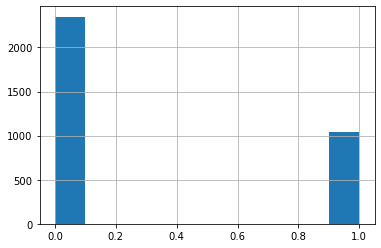

In [8]:
df['id'].hist()

# Анализ

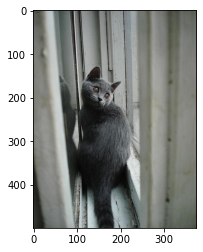

In [9]:
img = cv2.cvtColor(cv2.imread(path +'/' + df['name'][0]), cv2.COLOR_BGR2RGB)
plt.imshow(img)

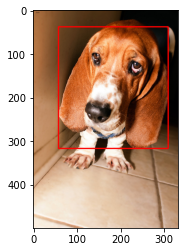

In [10]:
def get_rect_img(num):
    x_min = int(df['xmin'][num])
    y_min = int(df['ymin'][num])
    x_max = int(df['xmax'][num])
    y_max = int(df['ymax'][num])

    start_point = (x_min, y_min)
    end_point = (x_max, y_max)
    color = (255, 0, 0)
    thickness = 2
    img = cv2.cvtColor(cv2.imread(path +'/' + df['name'][num]), cv2.COLOR_BGR2RGB)
    img = cv2.rectangle(img, start_point, end_point, color, thickness)
    plt.imshow(img)
    plt.show()
    
def get_point(num):
    x_min = df['xmin'][num]
    y_min = df['ymin'][num]
    x_max = df['xmax'][num]
    y_max = df['ymax'][num]
    return [x_min, y_min, x_max, y_max]

get_rect_img(10)

Размеры

In [11]:
widths = []
heights = []

for i, img_name in enumerate(df['name']):
    img = cv2.imread(path +'/' + img_name)
    widths.append(img.shape[0])
    if img.shape[0] == 108:
        print(i)
    if img.shape[0] == 2606:
        print(i)
    heights.append(img.shape[1])
    if img.shape[1] == 117:
        print(i)

widths = set(widths)
heights = set(heights)
# widths

478
822
1567


In [12]:
min(widths), max(widths)

(108, 2606)

In [13]:
min(heights), max(heights)

(117, 3264)

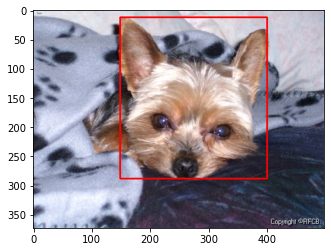

In [14]:
get_rect_img(569)

In [15]:
def crop_img(img, points):
    width = img.shape[1]
    height = img.shape[0]

    points = [int(width * df['xmin'][num]), int(height * df['ymin'][num]), int(width * df['xmax'][num]), int(height * df['ymax'][num])]

    crop_x1 = np.random.choice(range(0, points[0]))
    crop_y1 = np.random.choice(range(0, points[1]))

    crop_x2 = np.random.choice(range(points[2], width))
    crop_y2 = np.random.choice(range(points[3], height))

    new_points = [points[0] - crop_x1, points[1] - crop_y1, points[2] - crop_x1, points[3] - crop_y1]

    croped_img = img[crop_y1:crop_y2, crop_x1:crop_x2]

    crop_width = croped_img.shape[1]
    crop_height = croped_img.shape[0]

    float_points = [new_points[0]/crop_width, new_points[1]/crop_height ,new_points[2]/crop_width, new_points[3]/crop_height]
    
    return croped_img, float_points

In [16]:
np.random.random()

0.9055779851033348

In [17]:
x_min = [1,2,3,4,5]
x_max = [2,3,4,5,6]

np.array([x_min, x_max]).T

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6]])

In [18]:
num = 569

img = cv2.imread(os.path.join(path, df['name'][num]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

points = [df['xmin'][num], df['ymin'][num], df['xmax'][num], df['ymax'][num]]

width = img.shape[1]
height = img.shape[0]

points = [int(width * df['xmin'][num]), int(height * df['ymin'][num]), int(width * df['xmax'][num]), int(height * df['ymax'][num])]

crop_x1 = np.random.choice(range(0, points[0]))
crop_y1 = np.random.choice(range(0, points[1]))

crop_x2 = np.random.choice(range(points[2], width))
crop_y2 = np.random.choice(range(points[3], height))

new_points = [points[0] - crop_x1, points[1] - crop_y1, points[2] - crop_x1, points[3] - crop_y1]

croped_img = img[crop_y1:crop_y2, crop_x1:crop_x2]

crop_width = croped_img.shape[1]
crop_height = croped_img.shape[0]

float_points = [new_points[0]/crop_width, new_points[1]/crop_height ,new_points[2]/crop_width, new_points[3]/crop_height]

print(float_points)
color = (255, 0, 0)
thickness = 2
rec_img = cv2.rectangle(croped_img, (new_points[0], new_points[1]), (new_points[2], new_points[3]), color, thickness)
plt.imshow(rec_img)

ValueError: 'a' cannot be empty unless no samples are taken

In [19]:
df

name id xmin ymin xmax ymax
0     British_Shorthair_129.jpg  1  111  128  201  227
1             leonberger_10.jpg  0  168    7  327  125
2                 boxer_183.jpg  0  190   80  327  177
3             shiba_inu_130.jpg  0  119   91  210  216
4          Russian_Blue_168.jpg  1   51  120  151  230
...                         ... ..  ...  ...  ...  ...
3380         leonberger_181.jpg  0   84  111  194  202
3381    wheaten_terrier_132.jpg  0  138  110  249  222
3382   american_bulldog_161.jpg  0    5    1  438  333
3383            Persian_149.jpg  1  272   20  454  195
3384         Maine_Coon_132.jpg  1  143    6  354  221

[3385 rows x 6 columns]

In [20]:
x_min, y_min, x_max, y_max = get_point(569)
x_min, y_min, x_max, y_max

(149, 12, 401, 288)

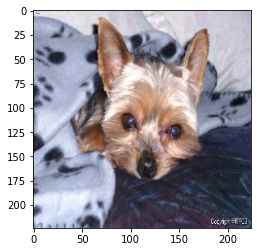

In [21]:
img = cv2.cvtColor(cv2.imread(os.path.join(path, df['name'][569])), cv2.COLOR_BGR2RGB)

resized = cv2.resize(img, (224, 224))   
plt.imshow(resized)

In [22]:
img.shape

(373, 499, 3)

In [23]:
x_min_proc = x_min/img.shape[1]
x_max_proc = x_max/img.shape[1]

y_min_proc = y_min/img.shape[0]
y_max_proc = y_max/img.shape[0]

In [24]:
x_min_proc,  y_min_proc, x_max_proc, y_max_proc

(0.2985971943887776, 0.032171581769437, 0.8036072144288577, 0.7721179624664879)

In [25]:
new_rect = 224 * np.array([x_min_proc,  y_min_proc, x_max_proc, y_max_proc])
new_rect = new_rect.astype(int)
new_rect

array([ 66,   7, 180, 172])

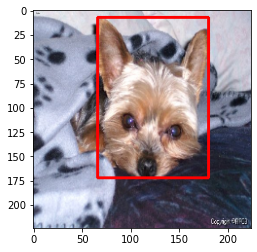

In [26]:
resized = cv2.rectangle(resized, (new_rect[0], new_rect[1]), (new_rect[2], new_rect[3]), (255,0,0), 2)
plt.imshow(resized)

In [27]:
len(df)

3385

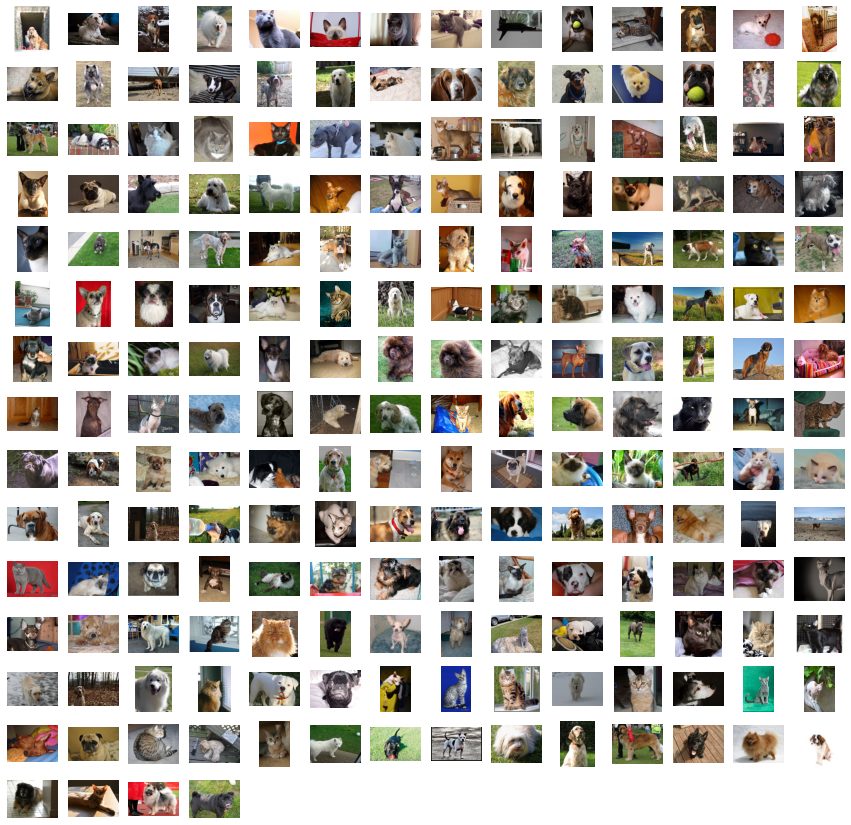

In [28]:
import math 

image_names = df['name'][1400:1600]

n_images = len(image_names)
w = int(n_images ** .5)
h = math.ceil(n_images / w)

plt.figure(figsize=(15, 15))
for ind, image_name in enumerate(image_names):
    img = cv2.imread(os.path.join(path, image_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(h, w, ind + 1)
    plt.imshow(img)
    plt.axis("off")

In [29]:
import albumentations as A

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = bbox
    x_min = int(x_min*img.shape[1])
    x_max = int(x_max*img.shape[1])
    y_min = int(y_min*img.shape[0])
    y_max = int(y_max*img.shape[0])

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)


#albumentations
#pascal_voc

In [37]:
transform_crop = A.Compose([A.RandomCropNearBBox(p = 1.0)], bbox_params = A.BboxParams(format='albumentations', label_fields=['category_ids']))

# transform = A.Compose(
#   [A.RandomCrop(width=330, height=330), A.RandomBrightnessContrast(p=0.2)],
#   bbox_params=A.BboxParams(format="coco", label_fields=["bbox_classes"]))
    
transform = A.Compose(
    [A.HorizontalFlip(p = 0.5), 
     A.VerticalFlip(p = 0.5),
#      A.Resize(224, 224),
#      A.RandomCropNearBBox(p = 1.0),
     A.Resize(224, 224),
    ],
    bbox_params=A.BboxParams(format='albumentations', label_fields=['category_ids']),
)

num = 101
image = cv2.imread(os.path.join(path, df['name'][num]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

bboxes = [get_point(num)]

category_ids = [df['id'][num]]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'dog', 1: 'cat'}



In [38]:
df['id'][num]

0

In [39]:
bboxes

[[125, 142, 218, 232]]

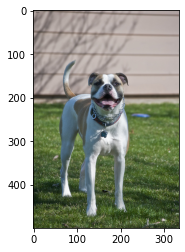

In [40]:
# visualize(image, bboxes, category_ids, category_id_to_name)
lol = visualize_bbox(image, bboxes[0], category_id_to_name[0], color=BOX_COLOR, thickness=2)
plt.imshow(lol)

In [42]:
bboxes = bboxes[0]
bboxes = [bboxes[0] / image.shape[1], bboxes[1] / image.shape[0], bboxes[2] / image.shape[1], bboxes[3] / image.shape[0]]
bboxes = [bboxes]

In [43]:
bboxes

[[0.37425149700598803, 0.284, 0.6526946107784432, 0.464]]

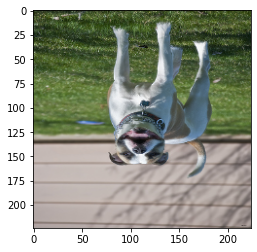

In [44]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
plt.imshow(transformed['image'])

In [45]:
transformed

{'image': array([[[ 52,  68,  39],
         [ 76,  86,  54],
         [ 80,  92,  60],
         ...,
         [ 57,  76,  29],
         [ 50,  66,  22],
         [ 53,  70,  30]],
 
        [[ 61,  77,  46],
         [ 56,  67,  34],
         [ 64,  79,  49],
         ...,
         [ 49,  68,  22],
         [ 56,  73,  28],
         [ 56,  74,  29]],
 
        [[ 57,  71,  39],
         [ 32,  43,  18],
         [ 40,  49,  23],
         ...,
         [ 37,  54,  11],
         [ 53,  71,  27],
         [ 54,  77,  24]],
 
        ...,
 
        [[176, 162, 161],
         [176, 162, 161],
         [176, 162, 161],
         ...,
         [167, 156, 152],
         [160, 150, 145],
         [143, 133, 128]],
 
        [[172, 161, 159],
         [172, 161, 159],
         [172, 161, 159],
         ...,
         [151, 141, 137],
         [141, 130, 126],
         [123, 114, 109]],
 
        [[169, 158, 156],
         [170, 158, 156],
         [170, 159, 157],
         ...,
         [107,  98,

In [47]:
transform_crop(image=image, bboxes=bboxes, category_ids=category_ids)

AssertionError: RandomCropNearBBox requires ['cropping_bbox']

In [48]:
transformed['bboxes']

[(0.34730538922155685, 0.536, 0.625748502994012, 0.716)]

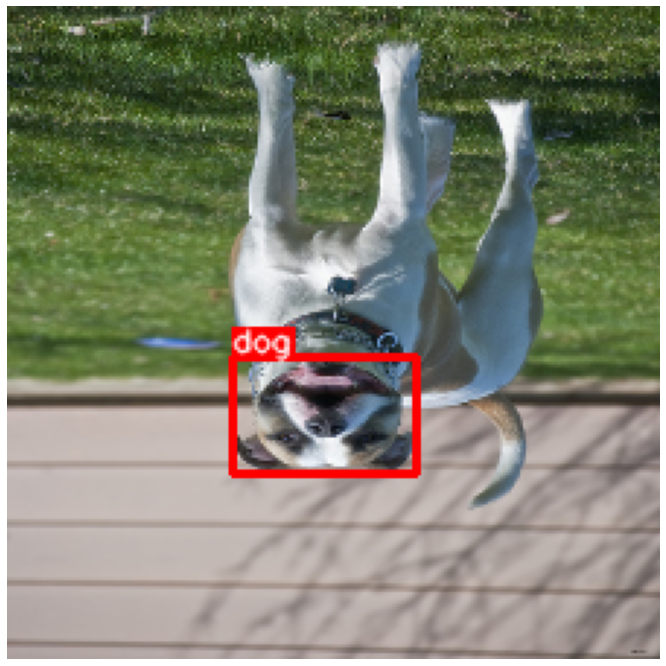

In [49]:
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

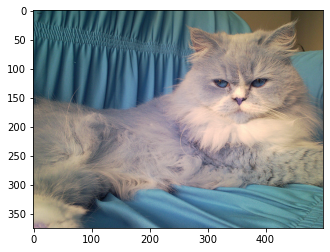

In [50]:
img = cv2.imread(os.path.join(path, df['name'][3383]))
plt.imshow(img)

In [51]:
img.shape

(375, 500, 3)

In [52]:
df 

name id xmin ymin xmax ymax
0     British_Shorthair_129.jpg  1  111  128  201  227
1             leonberger_10.jpg  0  168    7  327  125
2                 boxer_183.jpg  0  190   80  327  177
3             shiba_inu_130.jpg  0  119   91  210  216
4          Russian_Blue_168.jpg  1   51  120  151  230
...                         ... ..  ...  ...  ...  ...
3380         leonberger_181.jpg  0   84  111  194  202
3381    wheaten_terrier_132.jpg  0  138  110  249  222
3382   american_bulldog_161.jpg  0    5    1  438  333
3383            Persian_149.jpg  1  272   20  454  195
3384         Maine_Coon_132.jpg  1  143    6  354  221

[3385 rows x 6 columns]

In [53]:
for i in range(len(df)):
    row = df.loc[i]
    img = cv2.imread(os.path.join(path, row['name']))
    df['xmin'][i] = int(df['xmin'][i])/img.shape[1]
    df['xmax'][i] = int(df['xmax'][i])/img.shape[1]
    df['ymin'][i] = int(df['ymin'][i])/img.shape[0]
    df['ymax'][i] = int(df['ymax'][i])/img.shape[0]
    

In [54]:
num = 101
image = cv2.imread(os.path.join(path, df['name'][num]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

bboxes = [get_point(num)]

category_ids = [df['id'][num]]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'dog', 1: 'cat'}

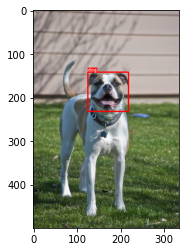

In [55]:
lol = visualize_bbox(image, bboxes[0], category_id_to_name[0], color=BOX_COLOR, thickness=2)
plt.imshow(lol)

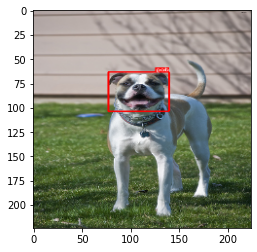

In [56]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
plt.imshow(transformed['image'])

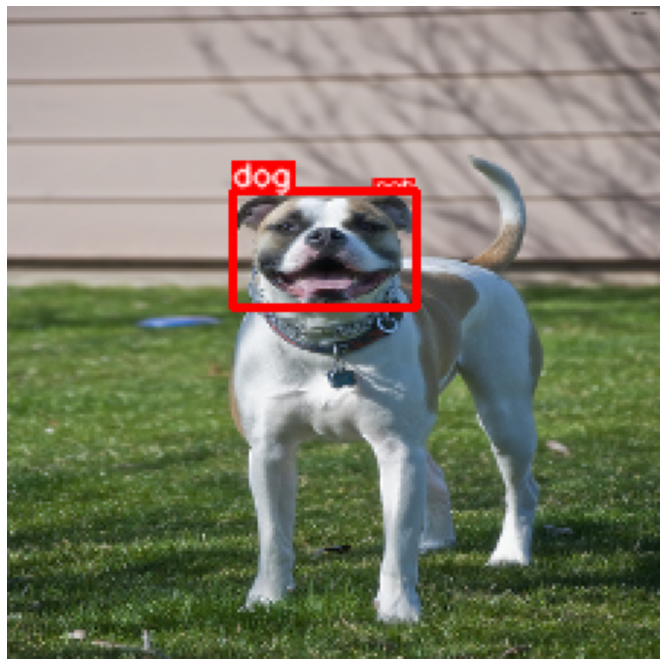

In [57]:
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [55]:
df

name id       xmin        ymin      xmax  \
0                       samoyed_144.jpg  0      0.394       0.176     0.632   
1                        Bengal_185.jpg  1       0.07    0.138947  0.345714   
2     american_pit_bull_terrier_183.jpg  0  0.0755556  0.00333333      0.92   
3                      havanese_147.jpg  0      0.416       0.256      0.84   
4                english_setter_151.jpg  0   0.191617       0.104  0.775449   
...                                 ... ..        ...         ...       ...   
3380                     Bombay_179.jpg  1   0.233735       0.098  0.831325   
3381           american_bulldog_172.jpg  0  0.0373333       0.028     0.976   
3382            wheaten_terrier_173.jpg  0   0.409091       0.268  0.790909   
3383               Russian_Blue_104.jpg  1      0.556    0.261333      0.71   
3384              saint_bernard_167.jpg  0      0.298    0.309309     0.642   

          ymax  
0     0.461333  
1     0.490526  
2     0.433333  
3         0.72  
4        0.424  
...        ...  
3380     0.568  
3381     0.672  
3382     0.498  
3383  0.485333  
3384  0.756757  

[3385 rows x 6 columns]

In [58]:
from sklearn.model_selection import StratifiedKFold

# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=9)
skf.get_n_splits(list(df['name']), list(df['id']))

# print(skf)

for train_index, test_index in skf.split(list(df['name']), list(df['id'])):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

TRAIN: 3008 TEST: 377
TRAIN: 3009 TEST: 376
TRAIN: 3009 TEST: 376
TRAIN: 3009 TEST: 376
TRAIN: 3009 TEST: 376
TRAIN: 3009 TEST: 376
TRAIN: 3009 TEST: 376
TRAIN: 3009 TEST: 376
TRAIN: 3009 TEST: 376


In [59]:
test_df = df.iloc[test_index]
test_df = test_df.reset_index(drop=True)
test_df.to_csv('test.csv')

In [135]:
test_df

name id      xmin        ymin      xmax      ymax
0         Russian_Blue_186.jpg  1  0.233803       0.118  0.735211     0.512
1               Bombay_172.jpg  1  0.705607   0.0228311  0.976636  0.321918
2         Russian_Blue_147.jpg  1     0.448    0.109333     0.788     0.576
3                Bengal_17.jpg  1     0.662    0.242667     0.816  0.458667
4              Persian_115.jpg  1     0.562    0.197333     0.788  0.501333
..                         ... ..       ...         ...       ...       ...
371       newfoundland_154.jpg  0     0.312    0.003003      0.93  0.912913
372          shiba_inu_103.jpg  0     0.408       0.165      0.57       0.4
373                pug_107.jpg  0  0.338667       0.342     0.504      0.44
374   British_Shorthair_17.jpg  1     0.232  0.00301205     0.744  0.728916
375  yorkshire_terrier_104.jpg  0     0.412    0.141566     0.746  0.608434

[376 rows x 6 columns]

In [60]:
train_df = df.iloc[train_index]
train_df = train_df.reset_index(drop=True)
train_df.to_csv('train.csv')

In [61]:
train_df

name id       xmin       ymin      xmax      ymax
0     British_Shorthair_129.jpg  1      0.296      0.256     0.536     0.454
1             leonberger_10.jpg  0      0.336   0.021021     0.654  0.375375
2                 boxer_183.jpg  0       0.38   0.213333     0.654     0.472
3             shiba_inu_130.jpg  0      0.238   0.243316      0.42   0.57754
4          Russian_Blue_168.jpg  1   0.153153       0.24  0.453453      0.46
...                         ... ..        ...        ...       ...       ...
3004                pug_114.jpg  0   0.146667      0.236     0.672      0.52
3005             Birman_126.jpg  1   0.233533       0.27  0.538922     0.478
3006             Sphynx_159.jpg  1  0.0357143      0.012  0.607143     0.446
3007             Bombay_109.jpg  1   0.674658  0.0913462  0.945205  0.461538
3008             Bombay_127.jpg  1   0.217949   0.225714  0.918803  0.651429

[3009 rows x 6 columns]

In [66]:
num = 33
image = cv2.imread(os.path.join(path, train_df['name'][num]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

bboxes = [get_point(num)]

category_ids = [train_df['id'][num]]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'dog', 1: 'cat'}

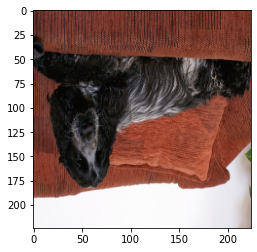

In [67]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
plt.imshow(transformed['image'])



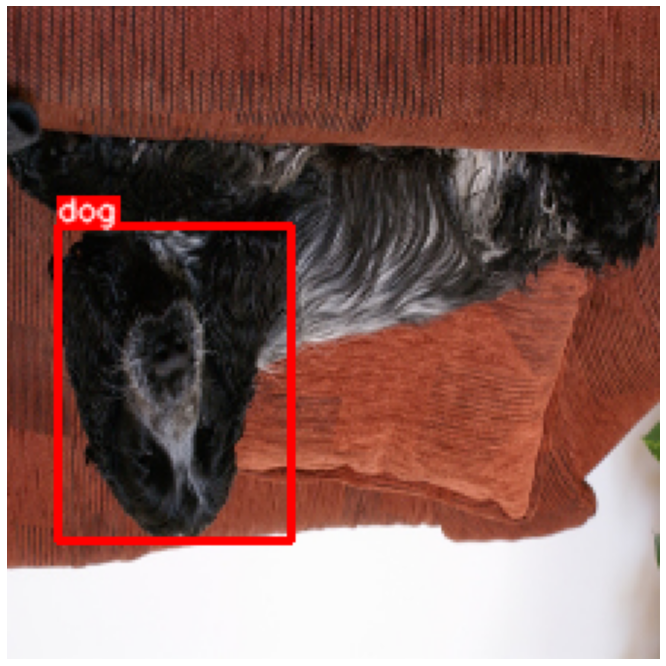

In [68]:
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [1]:
import torch

torch.cuda.is_available()

True

In [35]:
torch.cuda.get_device_name(0)

'GeForce RTX 3070'

In [2]:
torch.abs(-3)

TypeError: abs(): argument 'input' (position 1) must be Tensor, not int

In [4]:
pred = torch.Tensor([3, 5, 8, 10])

In [5]:
torch.abs(pred[0])

tensor(3.)

In [6]:
(pred[2]-pred[0])*(pred[3] - pred[1])

tensor(25.)

In [8]:
torch.Tensor(0.0)

TypeError: new(): data must be a sequence (got float)

In [11]:
pred[2] + 0


tensor(8.)

In [4]:
import timm
from pprint import pprint

model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnetlight',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_lite0',
 'ens_adv_inception_resnet_v2',
 'ese_vovnet19b_dw',
 'ese_vovnet39b',
 'fbnetc_100',
 'gluon_inception_v3',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resn

In [5]:
# 'mobilenetv2_100',
#  'mobilenetv2_110d',
#  'mobilenetv2_120d',
#  'mobilenetv2_140',
#  'mobilenetv3_large_100',
#  'mobilenetv3_rw',

mob_net = timm.create_model(model_name = 'mobilenetv2_120d', pretrained=True)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv2_120d_ra-5987e2ed.pth" to C:\Users\rashi/.cache\torch\hub\checkpoints\mobilenetv2_120d_ra-5987e2ed.pth


In [6]:
mob_net

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU6(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU6(inplace=True)
        (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
        (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (ac

In [35]:
from torch import nn
import torch.nn.functional as F
import torch

model = timm.create_model('mobilenetv2_120d', pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 5)
    
model

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU6(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU6(inplace=True)
        (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
        (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (ac

In [14]:
m = nn.Sigmoid()
m(torch.Tensor([1,2,3,1]))

tensor([0.7311, 0.8808, 0.9526, 0.7311])

In [19]:
class mobilenet(torch.nn.Module):
    def __init__(self, name):
        super(mobilenet, self).__init__()
        self.model = timm.create_model(name, pretrained=True)
        num_features = model.classifier.in_features
        self.model.classifier = nn.Linear(num_features, 5)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        x = self.model(x)
        y_pred = self.sigmoid(x)
        return y_pred

In [20]:
model = mobilenet('mobilenetv2_120d')

In [25]:
answ = model(torch.zeros(size = (4, 3, 224, 224)))

In [29]:
t = torch.rand(4, 4)
b = t.view(2, 8)
t

tensor([[0.3226, 0.5678, 0.5964, 0.8128],
        [0.6407, 0.3965, 0.2881, 0.5963],
        [0.3883, 0.5834, 0.8850, 0.6059],
        [0.6435, 0.3571, 0.6762, 0.3849]])

In [27]:
answ

tensor([[0.4722, 0.4760, 0.5033, 0.4580, 0.4681],
        [0.4722, 0.4760, 0.5033, 0.4580, 0.4681],
        [0.4722, 0.4760, 0.5033, 0.4580, 0.4681],
        [0.4722, 0.4760, 0.5033, 0.4580, 0.4681]], grad_fn=<SigmoidBackward>)

In [33]:
answ[:, 0]

tensor([0.4722, 0.4722, 0.4722, 0.4722], grad_fn=<SelectBackward>)

In [36]:
input = torch.randn((3, 2), requires_grad=True)
target = torch.rand((3, 2), requires_grad=False)
loss = F.binary_cross_entropy(F.sigmoid(input), target)
loss

C:\Users\rashi\Anaconda3\lib\site-packages\torch\nn\functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.6761, grad_fn=<BinaryCrossEntropyBackward>)